In [1]:
import numpy as np
import random
import itertools
import skimage
import copy
import matplotlib.pyplot as plt
from pprint import pprint
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [2]:
# grid_locations
# plant a tree(locations_planted, sample_random_location)
# run_simulation until all forest filled, record average yield

In [23]:
def get_probability_fire(L, rho):
        """
        e^(-i/rho)/e^(-j/rho)
        """
        result = np.zeros((L,L))
        indices = itertools.combinations(list(range(L)), 2)
        for idx in indices:
            i,j = idx
            result[i][j] = np.exp(-i/rho)*np.exp(-j/rho)
        # normalize
        result/= np.sum(result)
        return result

def get_random_tree_locations(L, D):
    """
    return random tree locations
    """
    coordinates = list(itertools.product(list(range(L)), repeat = 2))
    result = random.sample(coordinates, D)
    return result
    
def get_connected_components_matrix(test_matrix):
    """
    Given list of locations,
    find connected components matrix, props
    """
    connected_components = skimage.measure.label(test_matrix, connectivity=1)
    props = skimage.measure.regionprops(connected_components)
    for prop in props:
        coordinates = prop.coords
        area = prop.area
        for val in coordinates:
            x,y = val
            connected_components[x][y] = area
    return connected_components,props




In [24]:
L = 10
rho = L/10
D = L
P = get_probability_fire(L, rho)
pprint(P)

array([[0.000000, 0.546665, 0.201107, 0.073983, 0.027217, 0.010013,
        0.003683, 0.001355, 0.000498, 0.000183],
       [0.000000, 0.000000, 0.073983, 0.027217, 0.010013, 0.003683,
        0.001355, 0.000498, 0.000183, 0.000067],
       [0.000000, 0.000000, 0.000000, 0.010013, 0.003683, 0.001355,
        0.000498, 0.000183, 0.000067, 0.000025],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.001355, 0.000498,
        0.000183, 0.000067, 0.000025, 0.000009],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000183,
        0.000067, 0.000025, 0.000009, 0.000003],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000025, 0.000009, 0.000003, 0.000001],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000003, 0.000001, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.0000

In [25]:
tree_locations_to_test = get_random_trees(L, D)
grid = np.zeros((L,L),dtype = int)
for location in tree_locations_to_test:
    x,y = location
    grid[x][y] = 1
C,props = get_connected_components_matrix(grid)
print(grid)
print(C)

NameError: name 'get_random_trees' is not defined

In [26]:
def plant_a_tree(forest, locations, P, D):
    """
    sample D trees from locations
    return forest with tree planted, tree planted, min_fire_size.
    """
    min_fire_size = np.inf
    min_fire_size_location = None
    locations_sim = copy.deepcopy(locations)
    for _ in range(D):
        if len(locations_sim) == 0:
            continue
        forest_sim = copy.deepcopy(forest)
        test_location_idx = random.choice(range(len(locations_sim)))
        test_location = locations_sim[test_location_idx]
        x,y = test_location
        locations_sim.remove(test_location)
        forest_sim[x][y] = 1
        # compute C
        C_test, props = get_connected_components_matrix(forest_sim)
        # compute C_test*P and sum all elements
        test_fire_size = np.sum(C_test*P)
        if test_fire_size < min_fire_size:
            min_fire_size = test_fire_size
            min_fire_size_location = test_location
        # update forest with tree planted
        forest[min_fire_size_location] = 1
    return forest, min_fire_size_location, min_fire_size

def run_sim(L, D, rho):
    """
    init forest
    init P
    plant tree until trees filled
    record avg yield
    """
    forest = np.zeros((L,L))
    locations = list(itertools.product(list(range(L)), repeat = 2))
    P = get_probability_fire(L, rho)
    forest_avg_yields = []
    max_avg_yield_forest = None
    max_avg_yield = 0
    num_trees_planted = 0
    planted_locations = []
    while num_trees_planted < L*L:
        if num_trees_planted % 100 == 0:
            print(f"num_trees_planted = {num_trees_planted}")
        # plant a tree
        forest, min_fire_size_location, min_fire_size = plant_a_tree(forest, locations, P, D)
        num_trees_planted+=1
        # compute avg_yield
        avg_yield = num_trees_planted - min_fire_size
        if avg_yield > max_avg_yield:
            max_avg_yield = avg_yield
            max_avg_yield_forest = forest.copy()
         # Add to yields
        forest_avg_yields.append((num_trees_planted, avg_yield))
        planted_locations.append(min_fire_size_location)
        locations.remove(min_fire_size_location)
     
    return forest_avg_yields, max_avg_yield_forest, max_avg_yield

In [13]:
L = 32
rho = L/10
D = 1
forest_avg_yields, max_avg_yield_forest, max_avg_yield = run_sim(L, D, rho)
print("max_avg_yield = ", )

num_trees_planted = 0
num_trees_planted = 100
num_trees_planted = 200
num_trees_planted = 300
num_trees_planted = 400
num_trees_planted = 500
num_trees_planted = 600
num_trees_planted = 700
num_trees_planted = 800
num_trees_planted = 900
num_trees_planted = 1000


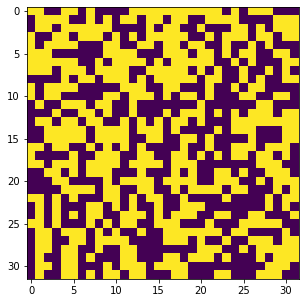

In [14]:
plt.imshow(max_avg_yield_forest)

# Experiment
## L = 32, D = 1,2,L, L^2, rho = L/10
a) Plot Forest at peak yield \
b) Plot the yield curves for each value of D, and identify (approximately) the \
peak yield and the density for which peak yield occurs for each value of D.\
c) Plot Zipf (or size) distributions of tree component sizes S at peak yield.\
Note: You will have to rebuild forests and stop at the peak yield value of D\
to find these distributions. By recording the sequence of optimal tree\
planting, this can be done without running the simulation again.\
d) Extra level: Plot Zipf (or size) distributions for component size for D = L2 for varying tree\
densities ρ = 0.10, 0.20, . . . , 0.90.

num_trees_planted = 0
num_trees_planted = 100
num_trees_planted = 200
num_trees_planted = 300
num_trees_planted = 400
num_trees_planted = 500
num_trees_planted = 600
num_trees_planted = 700
num_trees_planted = 800
num_trees_planted = 900
num_trees_planted = 1000
num_trees_planted = 0
num_trees_planted = 100
num_trees_planted = 200
num_trees_planted = 300
num_trees_planted = 400
num_trees_planted = 500
num_trees_planted = 600
num_trees_planted = 700
num_trees_planted = 800
num_trees_planted = 900
num_trees_planted = 1000
num_trees_planted = 0
num_trees_planted = 100
num_trees_planted = 200
num_trees_planted = 300
num_trees_planted = 400
num_trees_planted = 500
num_trees_planted = 600
num_trees_planted = 700
num_trees_planted = 800
num_trees_planted = 900
num_trees_planted = 1000
num_trees_planted = 0
num_trees_planted = 100
num_trees_planted = 200
num_trees_planted = 300
num_trees_planted = 400
num_trees_planted = 500
num_trees_planted = 600
num_trees_planted = 700
num_trees_planted = 8

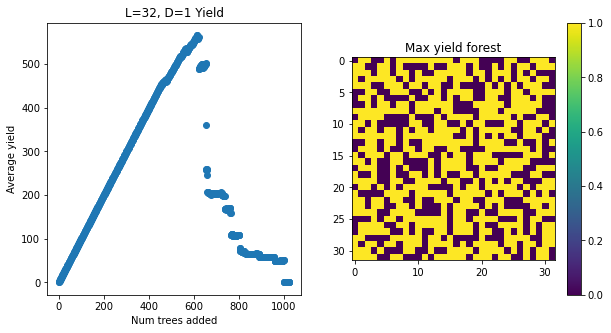

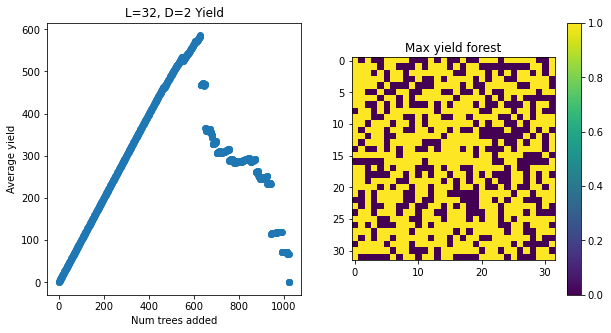

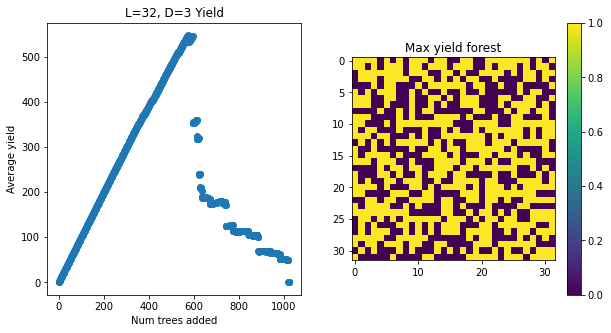

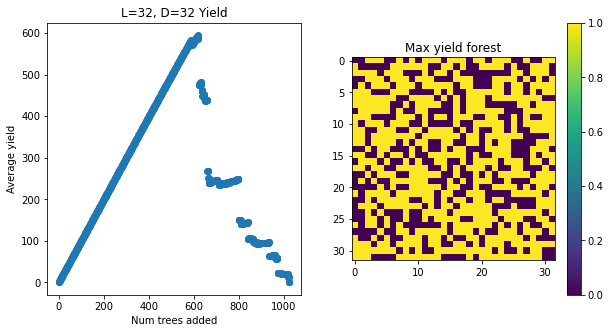

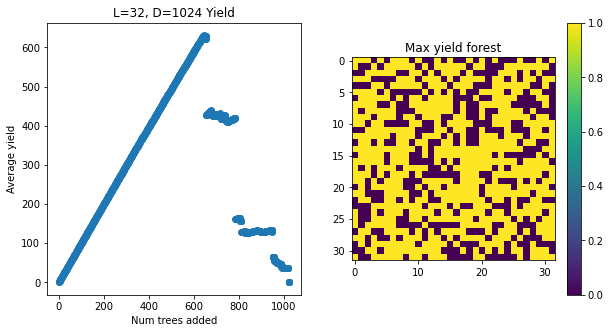

In [12]:
# a,b
L = 32
Ds = [1,2,3,L,L**2]
rho = L/10
experiment_results = {"max_forest": [], 
                      "max_avg_yield": [],
                     "forest_avg_yields": []
                     }
for D in Ds:
    forest_avg_yields, max_avg_yield_forest, max_avg_yield = run_sim(L, D, rho)
    experiment_results["max_forest"].append(max_avg_yield_forest)
    experiment_results["max_avg_yield"].append(max_avg_yield)
    experiment_results["forest_avg_yields"].append(forest_avg_yields)
    plt.rcParams['figure.figsize'] = (10,5)
    fig, [maxyield_ax, im_ax] = plt.subplots(1, 2)
    maxyield_ax.scatter(*zip(*forest_avg_yields))
    maxyield_ax.set_xlabel('Num trees added')
    maxyield_ax.set_ylabel('Average yield')
    maxyield_ax.set_title(f'L={L}, D={D} Yield')
    img = im_ax.imshow(max_avg_yield_forest)
    im_ax.set_title('Max yield forest')
    fig.colorbar(img)
    fig_name = f"L_32_D_{D}_yield_over_trees_and_max_forest.png"
    plt.savefig(fig_name)
    
    


In [27]:
print(experiment_results.keys())

dict_keys(['max_forest', 'max_avg_yield', 'forest_avg_yields'])


In [22]:
for d,k in zip(Ds,experiment_results["max_avg_yield"]):
    print(f" D = {d}, max yield = {k}") 


 D = 1, max yield = 565.7236163945483
 D = 2, max yield = 585.6610427949086
 D = 3, max yield = 547.2802984803731
 D = 32, max yield = 594.5447972700489
 D = 1024, max yield = 630.9953766902087


In [31]:
for d,k in zip(Ds,experiment_results["forest_avg_yields"]):
    yields = [i[1] for i in k]
    max_yield_density_loc = np.argmax(yields)
    max_yield_density = k[max_yield_density_loc][0]
    print(f" D = {d}, max yield density = {max_yield_density}") 

 D = 1, max yield density = 616
 D = 2, max yield density = 629
 D = 3, max yield density = 573
 D = 32, max yield density = 618
 D = 1024, max yield density = 643
